In [120]:
import vegas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from datetime import datetime
from problems import SimpleGaussian

In [121]:
NEVAL = 10_000  # num samples to draw
NITN = 10 # num importance shift iterations for vegas to perform
T = 50 # Num tests per dimension to get std of errors

Ds = list(range(1,11))

In [122]:
results = pd.DataFrame(index=Ds, columns=['pcntError_mean', 'pcntError_std','time_mean', 'time_std', 'N_mean', 'N_std'])

In [123]:
class ShapeAdapter:
    def __init__(self, f):
        self.f = f
    def __call__(self, X):
        return self.f(X)[0,0]

In [124]:
D = 3
problem = SimpleGaussian(D)
start_time = datetime.now()

# Perform integration
integ = vegas.Integrator([[-1.0, 1.0]]*D)
f = ShapeAdapter(problem.pdf)
I_hat = integ(f, nitn=NITN, neval=NEVAL)

In [125]:
def vegas_test(D):
    d = {}
    problem = SimpleGaussian(D)
    start_time = datetime.now()

    # Perform integration
    integ = vegas.Integrator([[-1.0, 1.0]]*D)
    f = ShapeAdapter(problem.pdf)
    I_hat = integ(f, nitn=NITN, neval=NEVAL).mean
    
    end_time = datetime.now()
    d['N'] = NEVAL * NITN
    d['pcntError'] = 100 * (I_hat - problem.answer) / problem.answer
    d['time'] =  (end_time - start_time).total_seconds()
    return d

In [126]:
for D in tqdm(Ds):
    experiments = [vegas_test(D) for t in range(T)]
    experiments = pd.DataFrame(experiments, columns=['pcntError', 'N', 'time'])
    results.loc[D, 'pcntError_mean'] = experiments['pcntError'].mean()
    results.loc[D, 'pcntError_std'] = experiments['pcntError'].std()
    results.loc[D, 'time_mean'] = experiments['time'].mean()
    results.loc[D, 'time_std'] = experiments['time'].std()
    results.loc[D, 'N_mean'] = experiments['N'].mean()
    results.loc[D, 'N_std'] = experiments['N'].std()

100%|██████████| 10/10 [28:56<00:00, 173.63s/it]


In [127]:
results

,pcntError_mean,pcntError_std,time_mean,time_std,N_mean,N_std
1,5.73447e-05,0.000528302,3.15197,0.449206,100000,0
2,-0.00274509,0.0450553,3.54211,0.245434,100000,0
3,-0.0144903,0.194791,3.34578,0.138635,100000,0
4,-0.151199,0.40444,3.39686,0.32114,100000,0
5,-20.512,33.2674,3.11896,0.243822,100000,0
6,-56.6837,43.117,3.1845,0.147032,100000,0
7,-92.1625,24.1117,3.10109,0.206191,100000,0
8,-99.9998,0.00045086,3.58026,0.114255,100000,0
9,-100,4.70111e-05,4.20623,0.184723,100000,0
10,-100,1.09779e-09,4.09418,0.45254,100000,0


In [132]:
# results.to_csv('./SimpleGaussian_Vegas.csv')

In [129]:
def plot_column(column, color):
    y1 = list(results[column+'_mean'] - results[column+'_std'])
    y2 = list(results[column+'_mean'])
    y3 = list(results[column+'_mean'] + results[column+'_std'])
    plt.plot(Ds, y2, color=color)
    plt.fill_between(Ds, y1, y3, color=color, alpha=0.3)

Text(0.5, 1.0, 'Percentage Error vs Dimension')

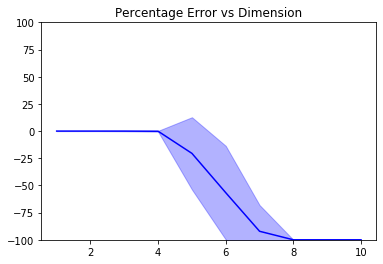

In [130]:
plot_column('pcntError', 'blue')
plt.ylim([-100,100])
plt.title('Percentage Error vs Dimension')

Text(0.5, 1.0, 'Time Taken(seconds) vs Dimension')

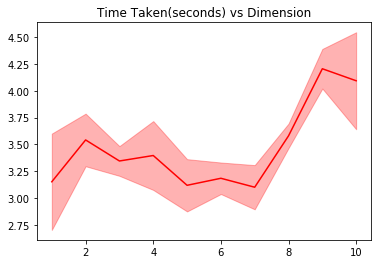

In [131]:
plot_column('time', 'red')
plt.title('Time Taken(seconds) vs Dimension')